In [1]:
import sys
from collections import OrderedDict
import pandas as pd
import numpy as np
# Load libraries
import pandas
import pandas as pd
#from pandas.plotting import scatter_matrix <-- deprecated
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

fname = 'BigData\\BigData.xlsx'
dataset = pandas.read_excel(fname)
# preprocessing
dataset = dataset.replace('.', np.nan)
dataset.iloc[:, 6:] = dataset.iloc[:, 6:].apply(lambda row: row.astype(float))

In [2]:
# Applying Regression Model on original data
columnsListB = dataset.columns.values.tolist()
depVar = dataset['Disease Incidence'].values

# Three cases for independent vars: TAV, Rain fall, RH
st1 = columnsListB.index('pcpn_JunW1')
ed1 = columnsListB.index('pcpn_SeptW4')
st2 = columnsListB.index('TAV_JunW1')
ed2 = columnsListB.index('TAV_SeptW4')
st3 = columnsListB.index('RAV_JunW1')
ed3 = columnsListB.index('RAV_SeptW4')
indepVarRain = dataset.iloc[:, st1:ed1+1]
indepVarTAV = dataset.iloc[:, st2:ed2+1]
indepVarRAV = dataset.iloc[:, st3:ed3+1]

y = dataset['Disease Incidence'].round(0)

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from yellowbrick.model_selection import FeatureImportances
from yellowbrick.contrib import ScatterVisualizer
from yellowbrick.regressor import PredictionError

In [4]:
################################# Rain Fall: Features selection #######################################

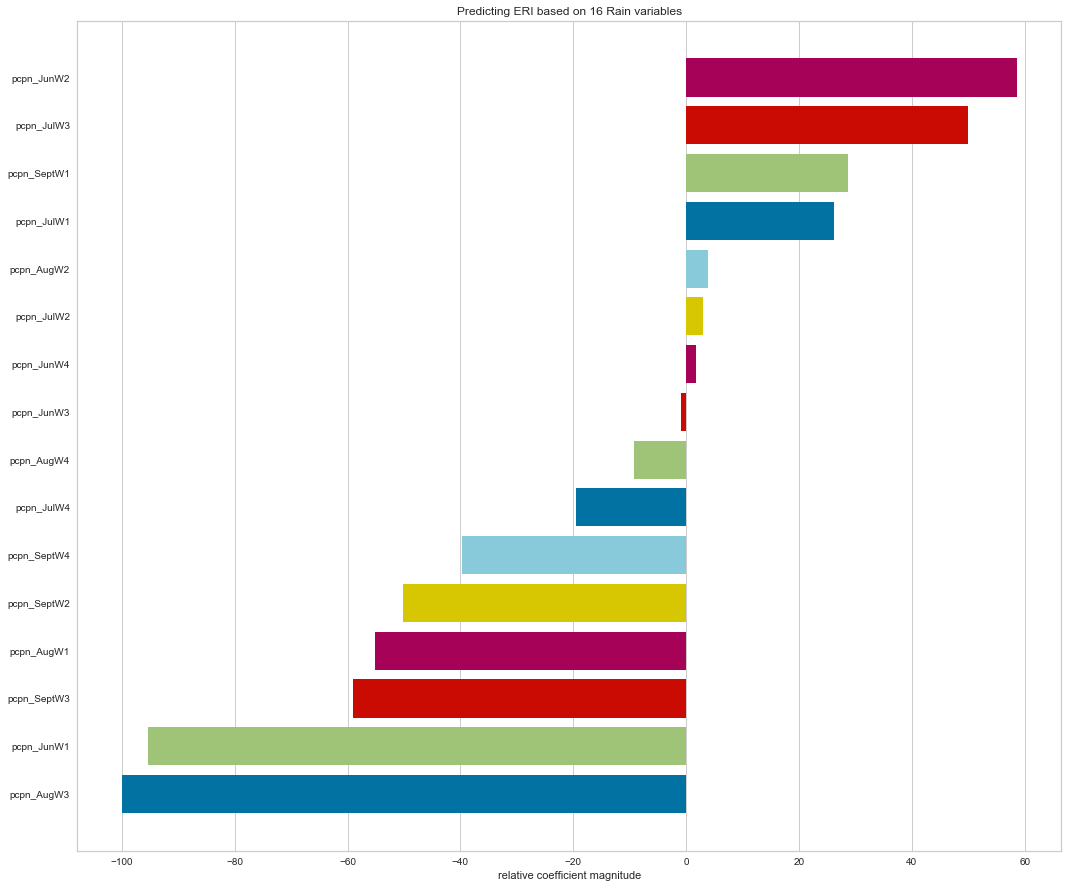

In [5]:
###### Using Random Forest
X = indepVarRain
# model = RandomForestClassifier(n_estimators=10)
# model = RandomForestRegressor(n_estimators = 10, )
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 16 Rain variables', size=(1080, 900),)
viz.fit(X, y)
viz.show()
# print(X.shape, y.shape)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
### Applying Standard Scaler:

allreg = dataset.iloc[:, st1:]
col = allreg.columns.values.tolist()
stdScaler = StandardScaler()
stdScaler.fit(allreg)
df = stdScaler.transform(allreg)
df = pd.DataFrame(df)
df = df.rename(columns=lambda x: col[int(x)])


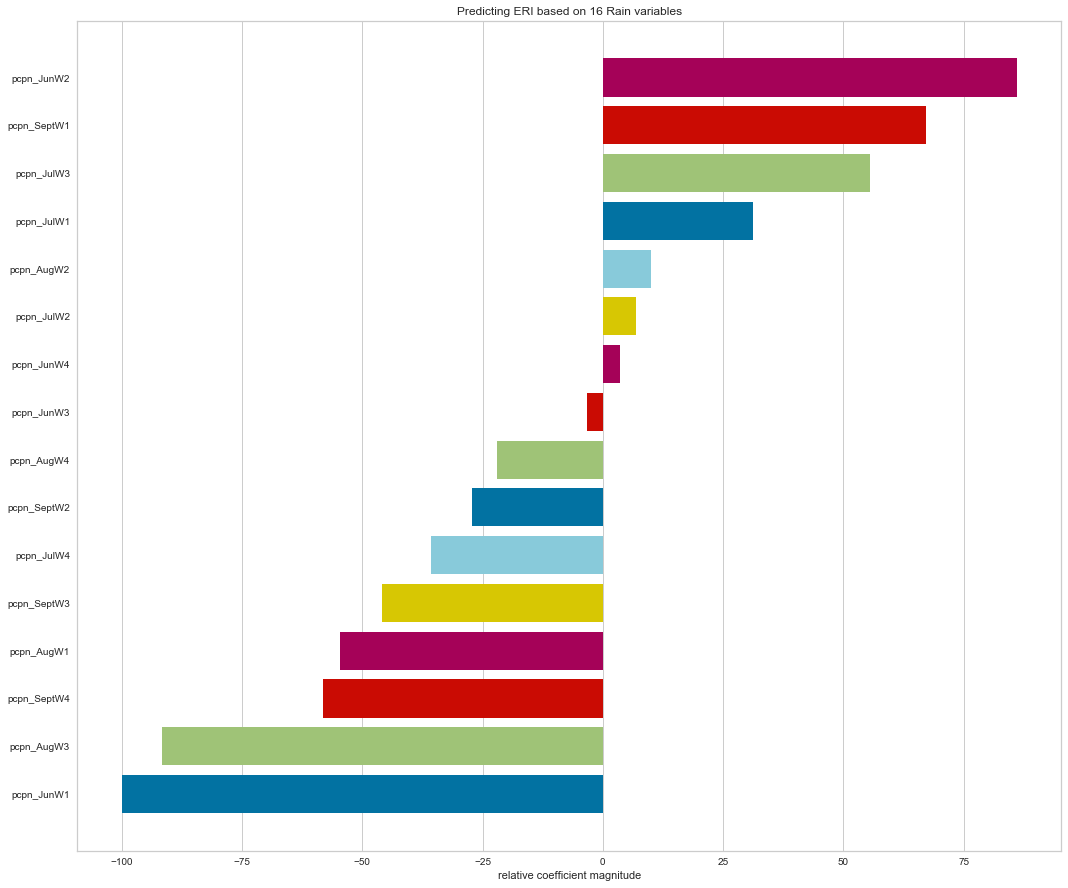

In [10]:
## For rainfall
X = df.iloc[:, 0:16]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 16 Rain variables', size=(1080, 900),)
viz.fit(X, y)
viz.show()


In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.contrib import ScatterVisualizer
from yellowbrick.regressor import PredictionError

In [77]:
pos_reg = ['pcpn_JunW2', 'pcpn_SeptW1', 'pcpn_JulW3', 'pcpn_JulW1', 'pcpn_AugW2', 'pcpn_JulW2', 'pcpn_JunW4']
df_pos_reg = allreg[pos_reg]
# X = df_pos_reg

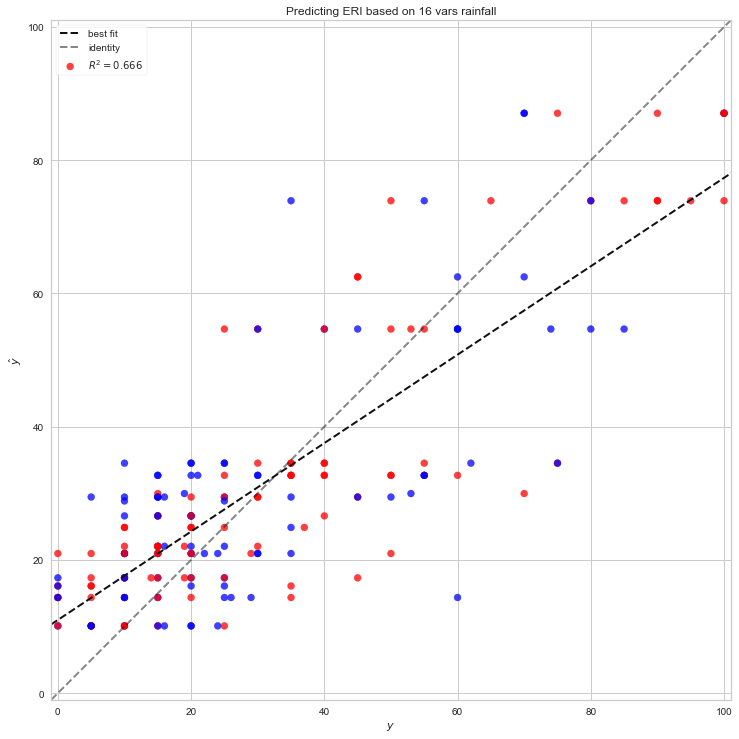

In [78]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on 16 vars rainfall'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

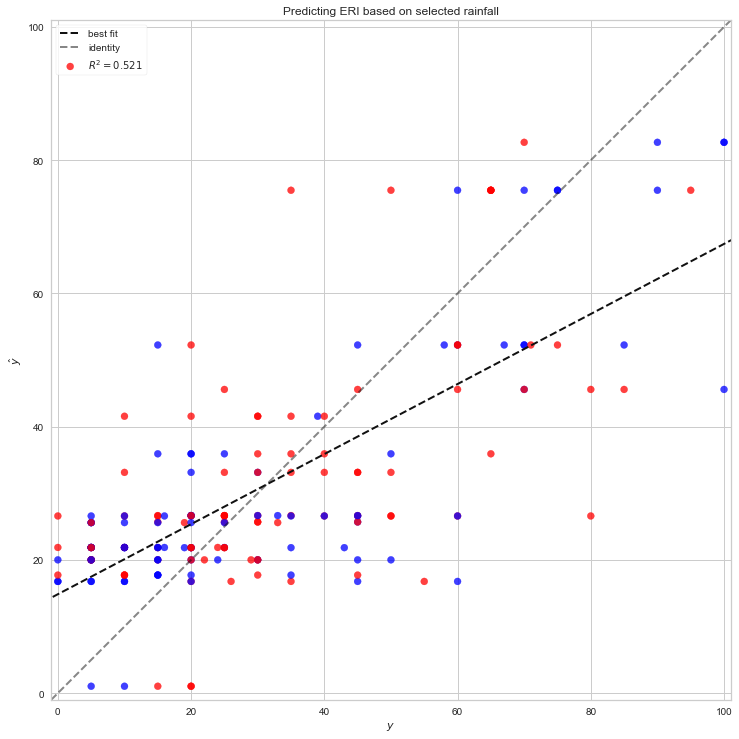

In [79]:
pos_reg = [ 'pcpn_JunW2', 'pcpn_SeptW1', 'pcpn_JulW3', 'pcpn_JulW1', 'pcpn_SeptW2', 'pcpn_JulW4', 'pcpn_SeptW3', 'pcpn_AugW1', 'pcpn_SeptW4', 'pcpn_AugW3', 'pcpn_JunW1',]
df_pos_reg = allreg[pos_reg]
X = df_pos_reg

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on selected rainfall'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

In [80]:
##### Using feature importance on all the 48 vars

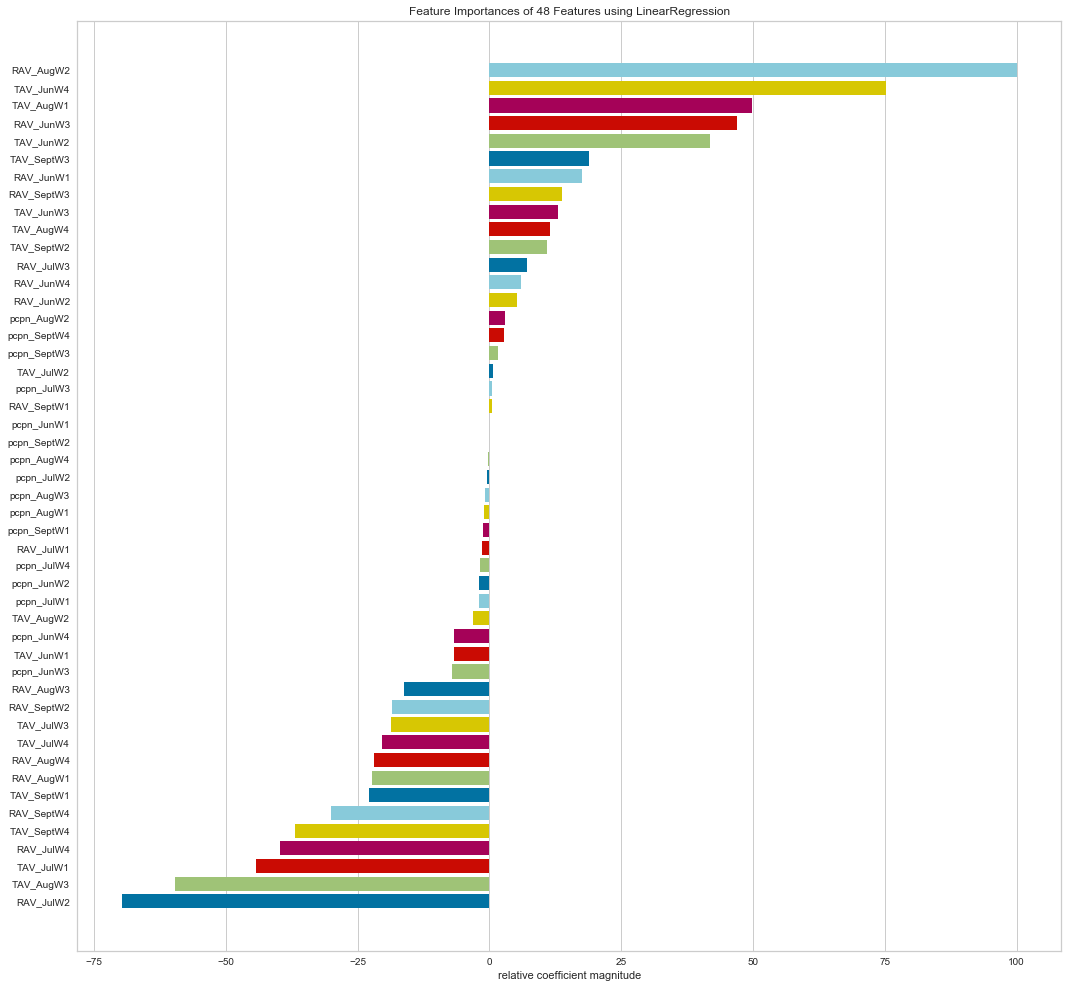

In [81]:
X = allreg
model = LinearRegression()
viz = FeatureImportances(model,  size=(1080, 1000),)
viz.fit(X, y, )
viz.show(outpath="featureimportance.png")
viz.show()

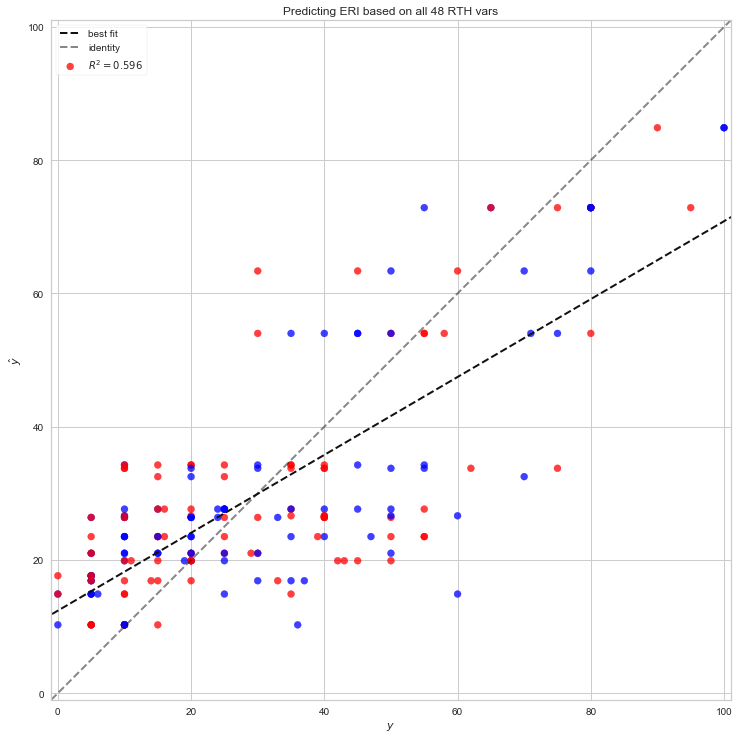

In [82]:
X = allreg
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on all 48 RTH vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

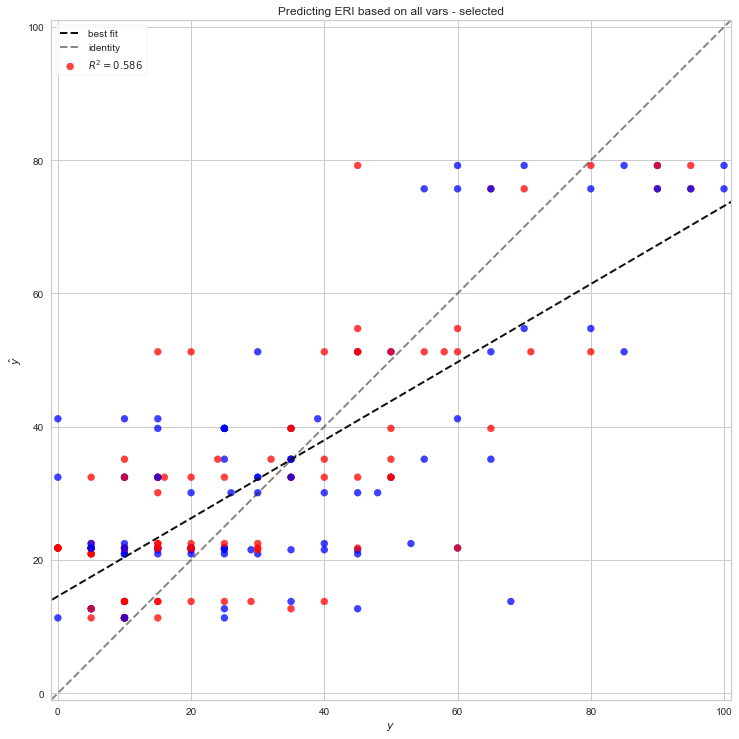

In [83]:
### scatter plot based on strong features:

allreg2List = [ 'RAV_AugW2', 'TAV_JunW4', 'TAV_AugW1', 'RAV_JunW3', 'TAV_JunW2', 'RAV_SeptW4', 'TAV_SeptW4', 'RAV_JulW4', 'TAV_JulW1', 'TAV_AugW3', 'RAV_JulW2',]
df_pos_reg = df[allreg2List]
X = df_pos_reg

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on all vars - selected'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

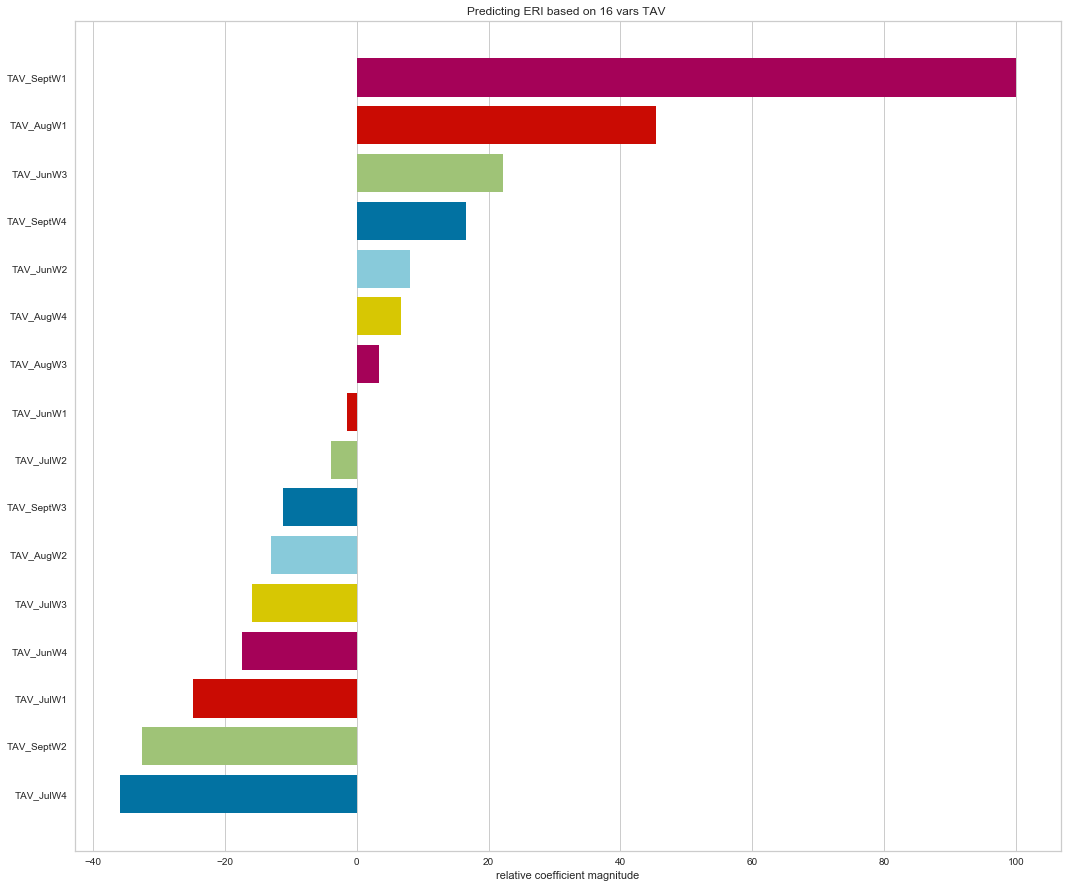

In [115]:
## For TAV
X = df.iloc[:, 16:32]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 16 vars TAV ', size=(1080, 900),)
viz.fit(X, y)
viz.show()


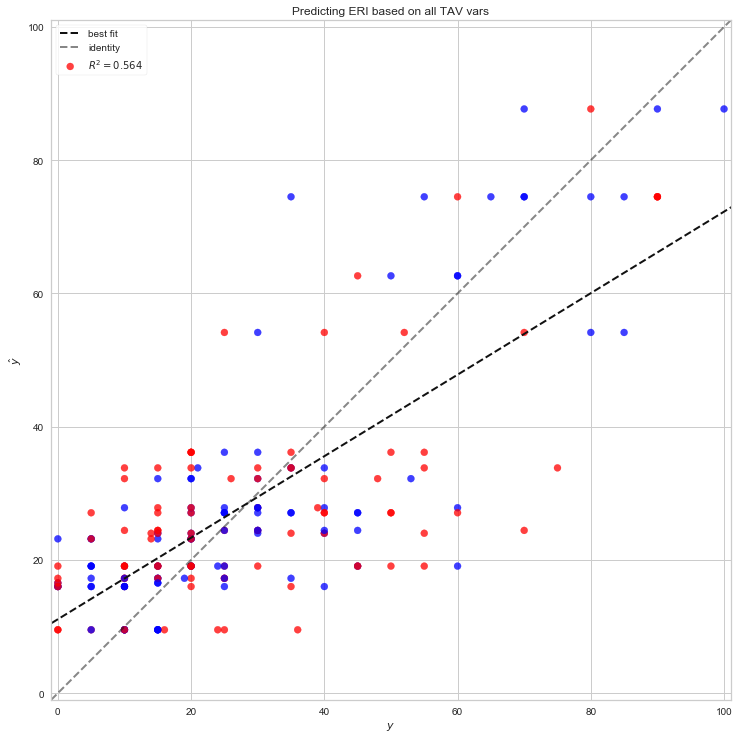

In [85]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on all TAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

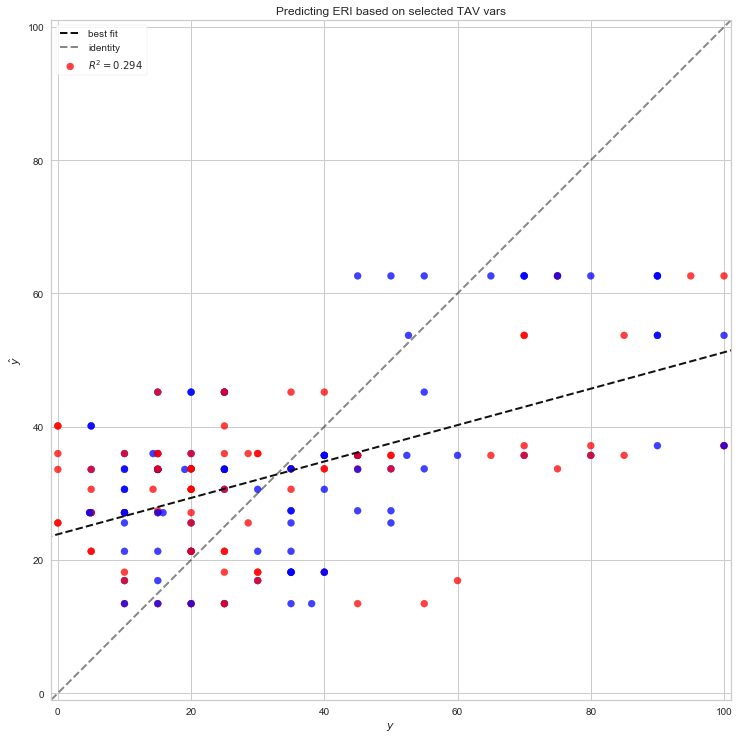

In [112]:
allreg3List = [  'TAV_SeptW1','TAV_AugW1', 'TAV_JulW1',  'TAV_SeptW2', 'TAV_JulW4', ]
df_pos_reg = df[allreg3List]
X = df_pos_reg

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on selected TAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

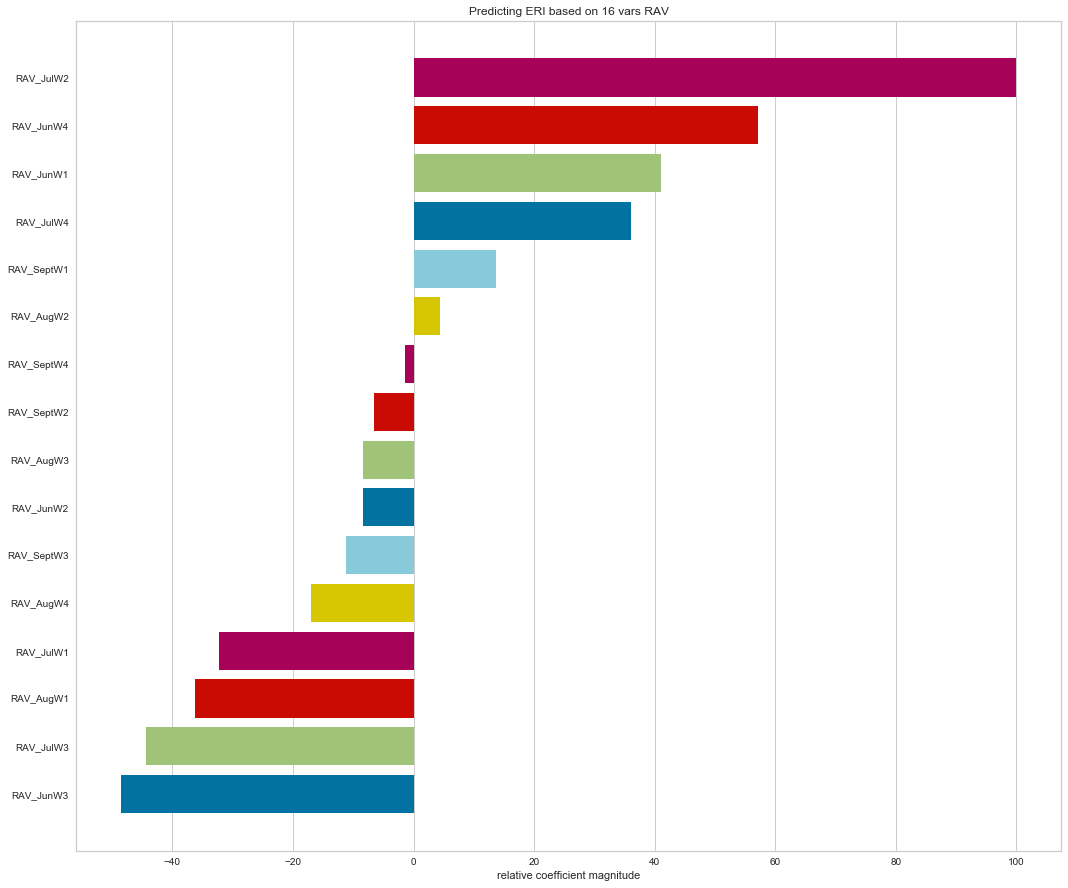

In [116]:
## For RAH
X = df.iloc[:, 32:64]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 16 vars RAV', size=(1080, 900),)
viz.fit(X, y)
viz.show()


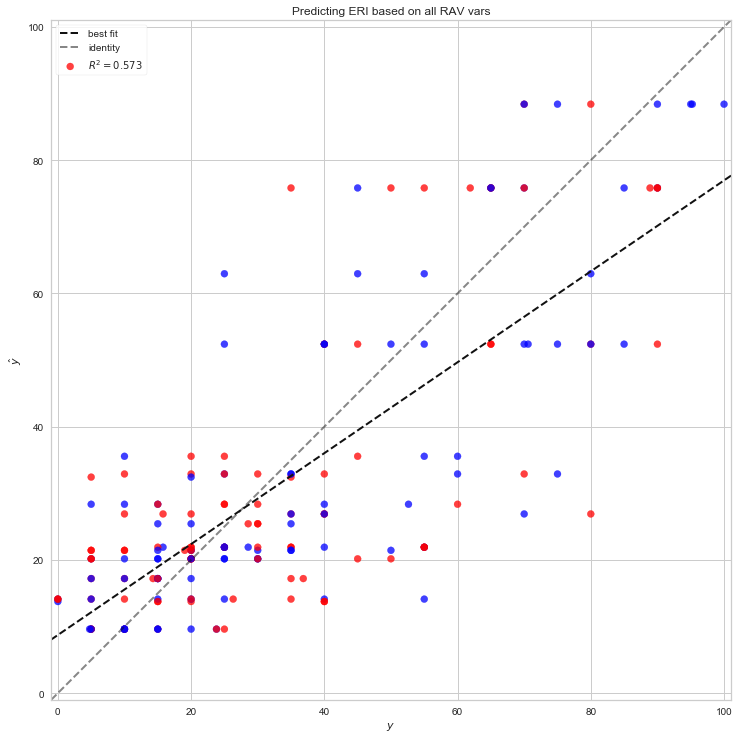

In [117]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on all RAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

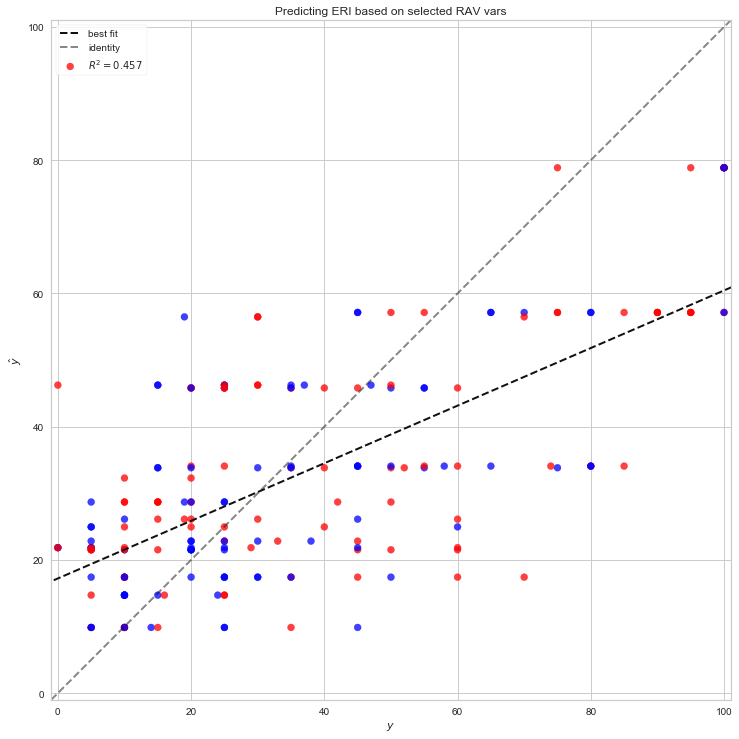

In [89]:
allreg4List = [  'RAV_JulW2','RAV_JunW4', 'RAV_JunW1', 'RAV_JulW4',  'RAV_JulW1', 'RAV_AugW1', 'RAV_JulW3', 'RAV_JunW3'   ]
df_pos_reg = df[allreg4List]
X = df_pos_reg

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on selected RAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

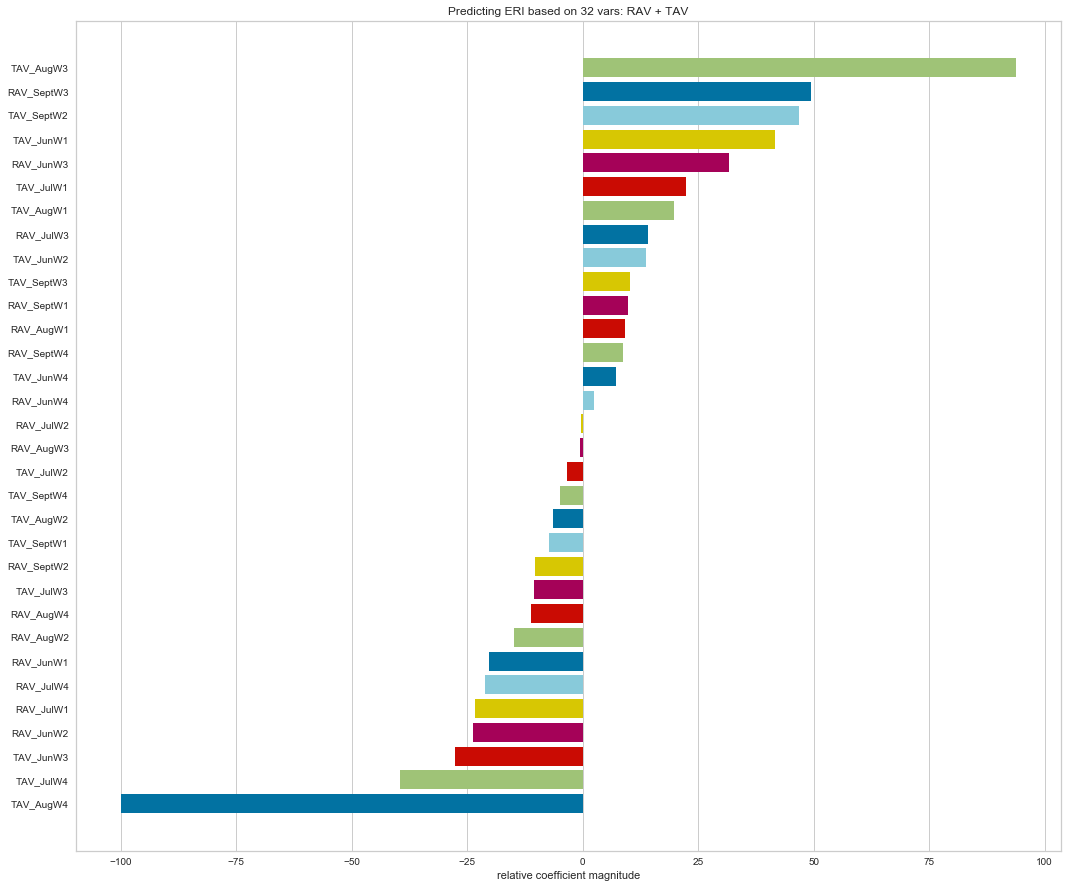

In [118]:

# combining RH and TAV
## For TAV
X = df.iloc[:, 16:64]
model = LinearRegression()
viz = FeatureImportances(model, title='Predicting ERI based on 32 vars: RAV + TAV', size=(1080, 900),)
viz.fit(X, y)
viz.show()


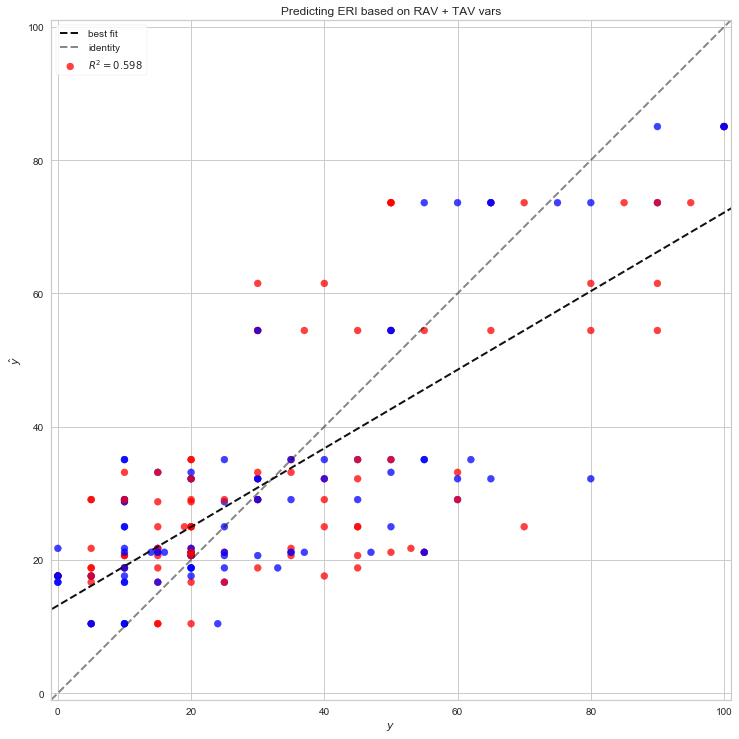

In [91]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on RAV + TAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

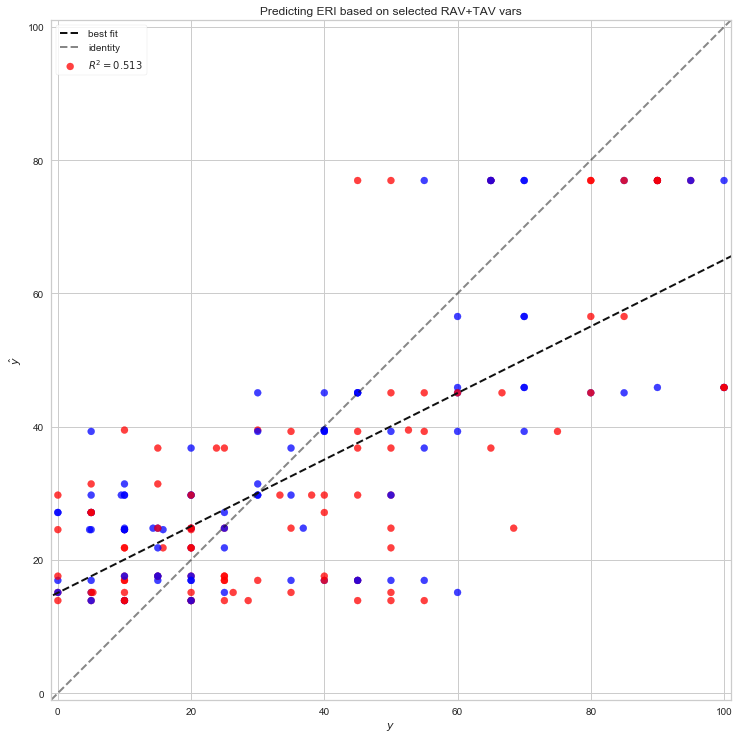

In [104]:
allreg5List = [ 'TAV_AugW3', 'RAV_SeptW3', 'TAV_SeptW2', 'TAV_JunW1', 'RAV_JunW3', 'TAV_JunW3', 'TAV_JulW4',  'TAV_AugW4'   ]
df_pos_reg = df[allreg5List]
X = df_pos_reg
y = dataset['Disease Incidence'] #.values.reshape(-1,1)
# y.shape
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(
                model, point_color=["red", "blue"], title='Predicting ERI based on selected RAV+TAV vars'
                , size=(1080, 900), )

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.size()
visualizer.show() 

In [132]:
import matplotlib.patches as mpatches

In [133]:
from sklearn.impute import SimpleImputer
X = dataset['Disease Incidence'].values.reshape(-1,1)
y = dataset['DON (ppm)'].values.reshape(-1,1)
# print(X.shape, y.shape)
impX = SimpleImputer(missing_values=np.nan, strategy='mean')
impy = SimpleImputer(missing_values=np.nan, strategy='mean')
X = impX.fit_transform(X)
y = impy.fit_transform(y)

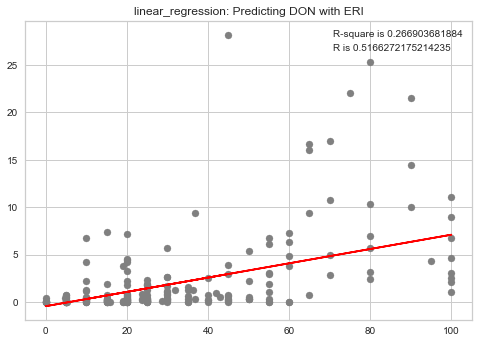

In [151]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
model = LinearRegression()
# model = RandomForestRegressor(max_depth=3, max_leaf_nodes=2, n_estimators=10)
# # model = BaggingRegressor(n_estimators=20)
# # model = AdaBoostRegressor() # no way# 
# # model = Lasso(alpha=15)




model.fit(X_train, y_train) #training the algorithm
y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
import math
r = math.sqrt(r2)
# print("Linear Reg --> R^2, R:", r2, r)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red',  )
plt.title('linear_regression: Predicting DON with ERI')


red_patch = mpatches.Patch(color='white', label='R-square is {0}'.format(str(r2)))
blue_patch = mpatches.Patch(color='white', label='R is {0}'.format(str(r)))

plt.gca().legend(handles=[red_patch, blue_patch], loc='upper right')
plt.savefig('AnalysisResults\\eri_don_linear_regression.png', dpi=300)
plt.show()



Linear Reg --> R^2, R: 0.307443484664 0.5544758648161833


C:\Users\kpodojos\AppData\Local\Continuum\Anaconda3V4\lib\site-packages\ipykernel\__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF --> R^2, R: 0.242622573369 0.49256732876735376


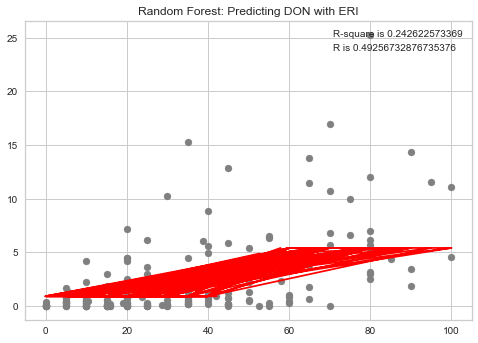

In [156]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
# model = LinearRegression()
model = RandomForestRegressor(max_depth=3, max_leaf_nodes=2, n_estimators=10)
# model = BaggingRegressor(n_estimators=20)
# model = AdaBoostRegressor() # no way# 
# model = Lasso(alpha=15)




model.fit(X_train, y_train) #training the algorithm
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red',  )
plt.title('Random Forest: Predicting DON with ERI')
r2 = model.score(X_test, y_test)
import math
r = math.sqrt(r2)
print("RF --> R^2, R:", r2, r)
red_patch = mpatches.Patch(color='white', label='R-square is {0}'.format(str(r2)))
blue_patch = mpatches.Patch(color='white', label='R is {0}'.format(str(r)))
plt.gca().legend(handles=[red_patch, blue_patch], loc='upper right')
plt.savefig('AnalysisResults\\eri_don_randomforest_regression.png', dpi=300)
plt.show()

RF --> R^2, R: 0.304855489072 0.5521372013113313


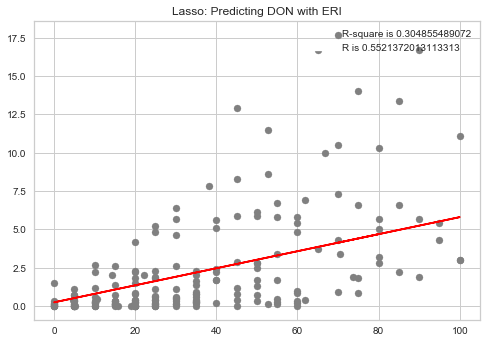

In [157]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Instantiate the linear model and visualizer
# model = LinearRegression()
# model = RandomForestRegressor(max_depth=3, max_leaf_nodes=2, n_estimators=10)
# model = BaggingRegressor(n_estimators=20)
model = Lasso(alpha=15)




model.fit(X_train, y_train) #training the algorithm
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red',  )
plt.title('Lasso: Predicting DON with ERI')
r2 = model.score(X_test, y_test)
import math
r = math.sqrt(r2)
print("RF --> R^2, R:", r2, r)
red_patch = mpatches.Patch(color='white', label='R-square is {0}'.format(str(r2)))
blue_patch = mpatches.Patch(color='white', label='R is {0}'.format(str(r)))
plt.gca().legend(handles=[red_patch, blue_patch], loc='upper right')
plt.savefig('AnalysisResults\\eri_don_lasso_regression.png', dpi=300)
plt.show()

In [64]:
r2 = model.score(X_test, y_test)
import math
r = math.sqrt(r2)
print("Lasso --> R^2, R:", r2, r)

Lasso --> R^2, R: 0.170356586349 0.4127427605041076
